# Author Classification
Katrin Schmidt &mdash; Carlotta Quensel

## About
As part of the CL Team Laboratory NLP, we classify the author of poetry through NLP methods.
Detailed progress reports can be found [here](https://ilias3.uni-stuttgart.de/goto.php?target=wiki_2425930_Group_4%3A_Carlotta_Nele_Farina_Quensel%2C_Katrin_Schmidt%2C_Author_Classification "Ilias wiki")

This project deals with author prediction as opposed to author allocation, which means that we predict the author of a given poem from a learned set of authors. 

## Data
The data we use is the collection of the [Poetry Foundation](https://www.poetryfoundation.org/), which is pulled from [kaggle](https://www.kaggle.com/johnhallman/complete-poetryfoundationorg-dataset?select=kaggle_poem_dataset.csv) as a finished csv-database. Depicted below is the distribution of poems and authors over the data set.


William Shakespeare      85
Anonymous                82
Alfred, Lord Tennyson    78
Rae Armantrout           62
William Wordsworth       59
                         ..
Carole Bernstein          1
Ava Leavell Haymon        1
Douglas S. Jones          1
Will Allen Dromgoole      1
Steven Heighton           1
Name: Author, Length: 3310, dtype: int64


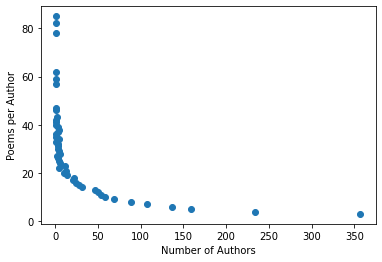

In [1]:
import pandas
import matplotlib.pyplot as plt
with open("poetryfoundation-dataset.csv", encoding="utf-8") as f:
    df = pandas.read_csv(f)

author_list = df["Author"].value_counts()
print(author_list)

author_bins = list()
current_bin = author_list[0]
counter = 0
for index in author_list.index:
    if author_list[index] == current_bin:
        counter += 1
    else:
        author_bins.append((current_bin, counter))
        current_bin = author_list[index]
        counter = 1
author_bins.append((current_bin, counter))

plt.scatter([a[1] for a in author_bins[:-2]], [a[0] for a in author_bins[:-2]])
plt.ylabel("Poems per Author")
plt.xlabel("Number of Authors")
plt.show()


As can be seen above, the data includes many authors who only wrote 1-5 poems, which is why we used only the 30 most prolific authors to get enough data points per class for the method.
> This number of authors is a hyperparameter that can be changed in ```main.py```:

> ```build_dataset(token_data, max_author=30)```

### Preprocessing
Katrin sorted the poems by author, cleaned up remaining HTML from the poems and tokenized them with the NLTK WordPunctTokenizer (see ```poetryfoundation_tokenizer.py```). Then Carlotta split the data into train and test set and converted the poems into bag-of-word vectors using the vocabulary in the train set (```tok_to_vec()``` in ```main.py```). 
With that, the baseline implementation begins.

## Baseline
### Learning the Features
The classifier uses ```features.py``` which was written by Carlotta and includes a class for maximum entropy features and the method to learn features from data with pointwise mutual information.
After initializing the classifier, the user can choose how many features are learned at most for each class (or author):
> ```learnFeatures(data, class_features=30)```

### Training
After learning the features, the classifier's weights are randomized between -10 and 10 for each feature. The training was written by Katrin and is done by either running the whole ```main.py``` at once (with preset hyperparameters) or by typing

> ```classifier.train(data, min_improvement=0.001, trace=True)```

The first parameter sets the threshold over which the improvement of accuracy between training epochs should lie and with the second parameter the user can track the improvement of accuracy and loss at each training step. The second method used as a part of the training is the partial derivative, which was also written by Katrin and follows the formula for maximum entropy training.

### Classification
The classification method was written by Carlotta. Apart from the straightforward implementation of the maximum entropy formula, it also includes an option to set custom weights for checking the accuracy of a training update before commiting to it and an option to get the probability of a label, which is used during training.
The poem is passed to the method as a document vector and the method returns the most probable author.

## Evaluation
The classifier is evaluated by instanciating an element of the Evaluation class (see ```evaluation.py```). The class requires the true authors and author predictions as two separate lists and computes all scores based on a confusion matrix. The main framework of the evaluation was written by Carlotta while Katrin implemented the precision, recall and f1-score. To conduct a full evaluation, the method ```fullEval()``` can be used, all other methods (including formated outputs) can be looked up in the class description.